## Helicity and emf analysis

$h_k = \boldsymbol{u \cdot \omega}$, $~$ $h_m = \boldsymbol{a \cdot b}$, $~$ $h_c = \boldsymbol{u \cdot b}$, $~$ $\mathcal{E}_x = (\boldsymbol{u \times b})_x$

$\langle \sim \rangle$ denotes averaging in planes perpendicular to the rotation vector

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as mplcm
import helicity as helicity

plt.style.use('benmc')
sub = 'le1e-8/'
inpath = '/vistabella/BRM35_4T/hirm_long/'
outpath = '/home/brm35/work/hirm/cloud/long/'

Spatial resolution and grid. Note we swap [X,Y,Z] -> [z,x,y] to have $\Omega \hat{e}_z$, $\mathrm{g} \hat{e}_y$ and $B_0 \hat{e}_x$.

In [60]:
NX = 512
NY = 512
NZ = 4*NX
shape = (NZ,NX,NY)
delta = 0.125
x = np.linspace(-np.pi,np.pi,NX) / delta
z = np.linspace(-5.0*np.pi,5.0*np.pi,NZ) / delta

**Plane-averaged quantities**

Using functions in helicity module

In [61]:
# Initialise arrays
hkav = np.zeros((NZ,5))
hkavr = np.zeros((NZ,5))
hmav = np.zeros((NZ,5))
hmavr = np.zeros((NZ,5))
hcav = np.zeros((NZ,5))
hcavr = np.zeros((NZ,5))
emf = np.zeros((NZ,5))
emfr = np.zeros((NZ,5))

# index counter
j = 0

# note for cross helicity we take the absolute value as it is not segregated above/below
# the source

for i in range(3,11+2,2):
    # kinetic helicity
    tmp = helicity.helicity(inpath+sub,i,shape,1)
    hkav[:,j] = np.mean(np.mean(tmp, axis=1), axis=1)
    tmp = helicity.relative_helicity(inpath+sub,i,shape,1)
    hkavr[:,j] = np.mean(np.mean(tmp, axis=1), axis=1)
    
    # magnetic helicity
    tmp = helicity.helicity(inpath+sub,i,shape,2)
    hmav[:,j] = np.mean(np.mean(tmp, axis=1), axis=1)
    tmp = helicity.relative_helicity(inpath+sub,i,shape,2)
    hmavr[:,j] = np.mean(np.mean(tmp, axis=1), axis=1)
    
    # cross helicity magntiude
    tmp = helicity.helicity(inpath+sub,i,shape,3)
    hcav[:,j] = np.mean(np.mean(abs(tmp), axis=1), axis=1)
    tmp = helicity.relative_helicity(inpath+sub,i,shape,3)
    hcavr[:,j] = np.mean(np.mean(abs(tmp), axis=1), axis=1)
    
    # emf in the direction of the mean-field
    tmp = helicity.emfx(inpath+sub,i,shape)
    emf[:,j] = np.mean(np.mean(tmp, axis=1), axis=1)
    tmp = helicity.emfx_norm(inpath+sub,i,shape)
    emfr[:,j] = np.mean(np.mean(tmp, axis=1), axis=1)
    j += 1

In [62]:
# output results to text files

np.savetxt(outpath+sub+'hk_dens_fz.out', hkav.astype('float32'), delimiter=' ', fmt='%13.5E')
np.savetxt(outpath+sub+'hk_rel_fz.out', hkavr.astype('float32'), delimiter=' ', fmt='%13.5E')

np.savetxt(outpath+sub+'hm_dens_fz.out', hmav.astype('float32'), delimiter=' ', fmt='%13.5E')
np.savetxt(outpath+sub+'hm_rel_fz.out', hmavr.astype('float32'), delimiter=' ', fmt='%13.5E')

np.savetxt(outpath+sub+'hc_dens_fz.out', hcav.astype('float32'), delimiter=' ', fmt='%13.5E')
np.savetxt(outpath+sub+'hc_rel_fz.out', hcavr.astype('float32'), delimiter=' ', fmt='%13.5E')

np.savetxt(outpath+sub+'emfx_dens_fz.out', emf.astype('float32'), delimiter=' ', fmt='%13.5E')
np.savetxt(outpath+sub+'emfx_rel_fz.out', emfr.astype('float32'), delimiter=' ', fmt='%13.5E')

**Plotting**

Kinetic helicity:

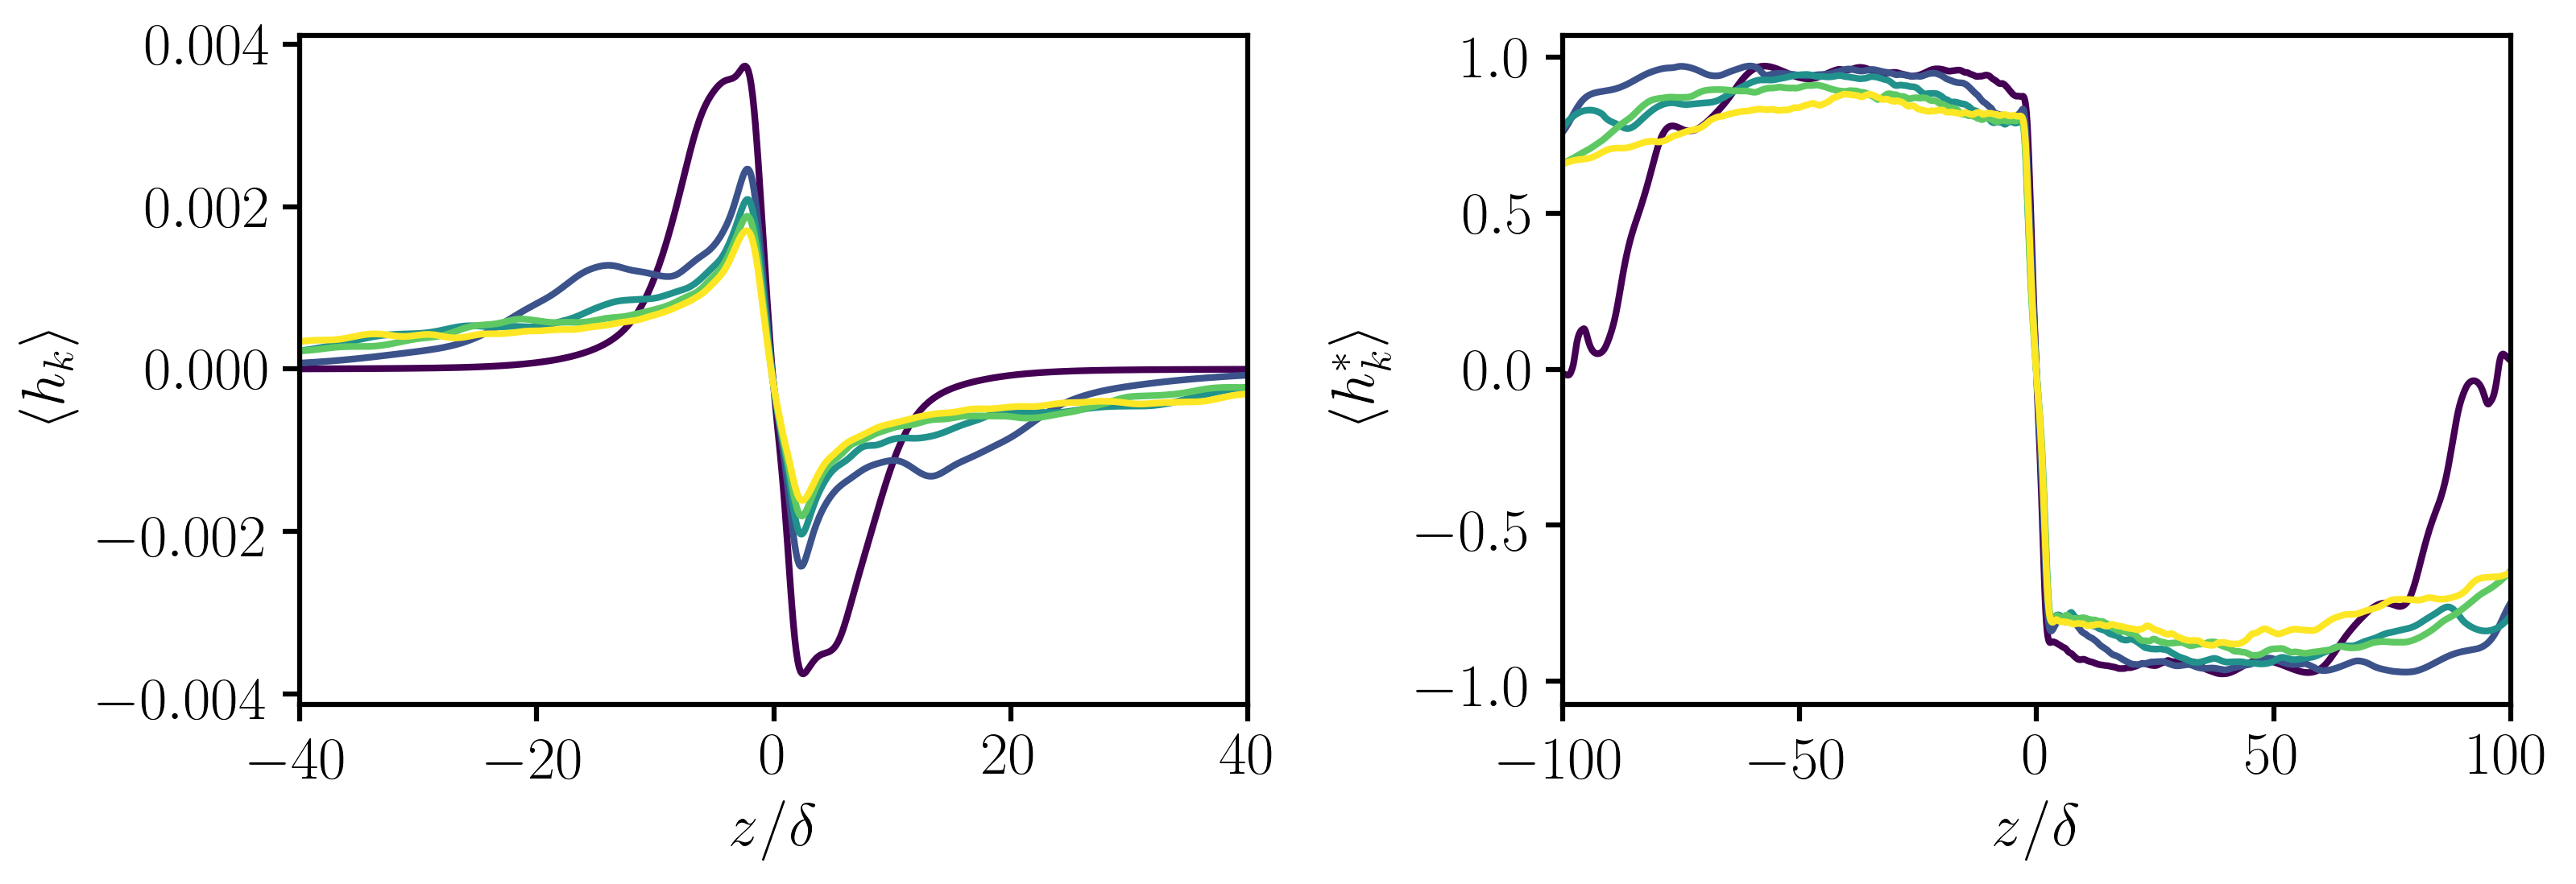

In [63]:
numcolors = 5
cm = plt.get_cmap('viridis')
cnorm = colors.Normalize(vmin=0, vmax=numcolors-1)
scalar_map = mplcm.ScalarMappable(norm=cnorm, cmap=cm)

plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
ax = plt.gca()
ax.set_prop_cycle(color=[scalar_map.to_rgba(i) for i in range(numcolors)])
for i in range(numcolors):
    plt.plot(z,hkav[:,i])

plt.xlim(-40,40)
plt.xlabel(r'$z/\delta$')
plt.ylabel(r'$\langle h_k \rangle$')

plt.subplot(1,2,2)
ax = plt.gca()
ax.set_prop_cycle(color=[scalar_map.to_rgba(i) for i in range(numcolors)])
for i in range(numcolors):
    plt.plot(z,hkavr[:,i])

plt.xlim(-100,100)
plt.xlabel(r'$z/\delta$')
plt.ylabel(r'$\langle h_k^* \rangle$')
plt.tight_layout()
plt.savefig(outpath+sub+'hkav.pdf', dpi=600, bbox_inches='tight')

Magnetic helicity:

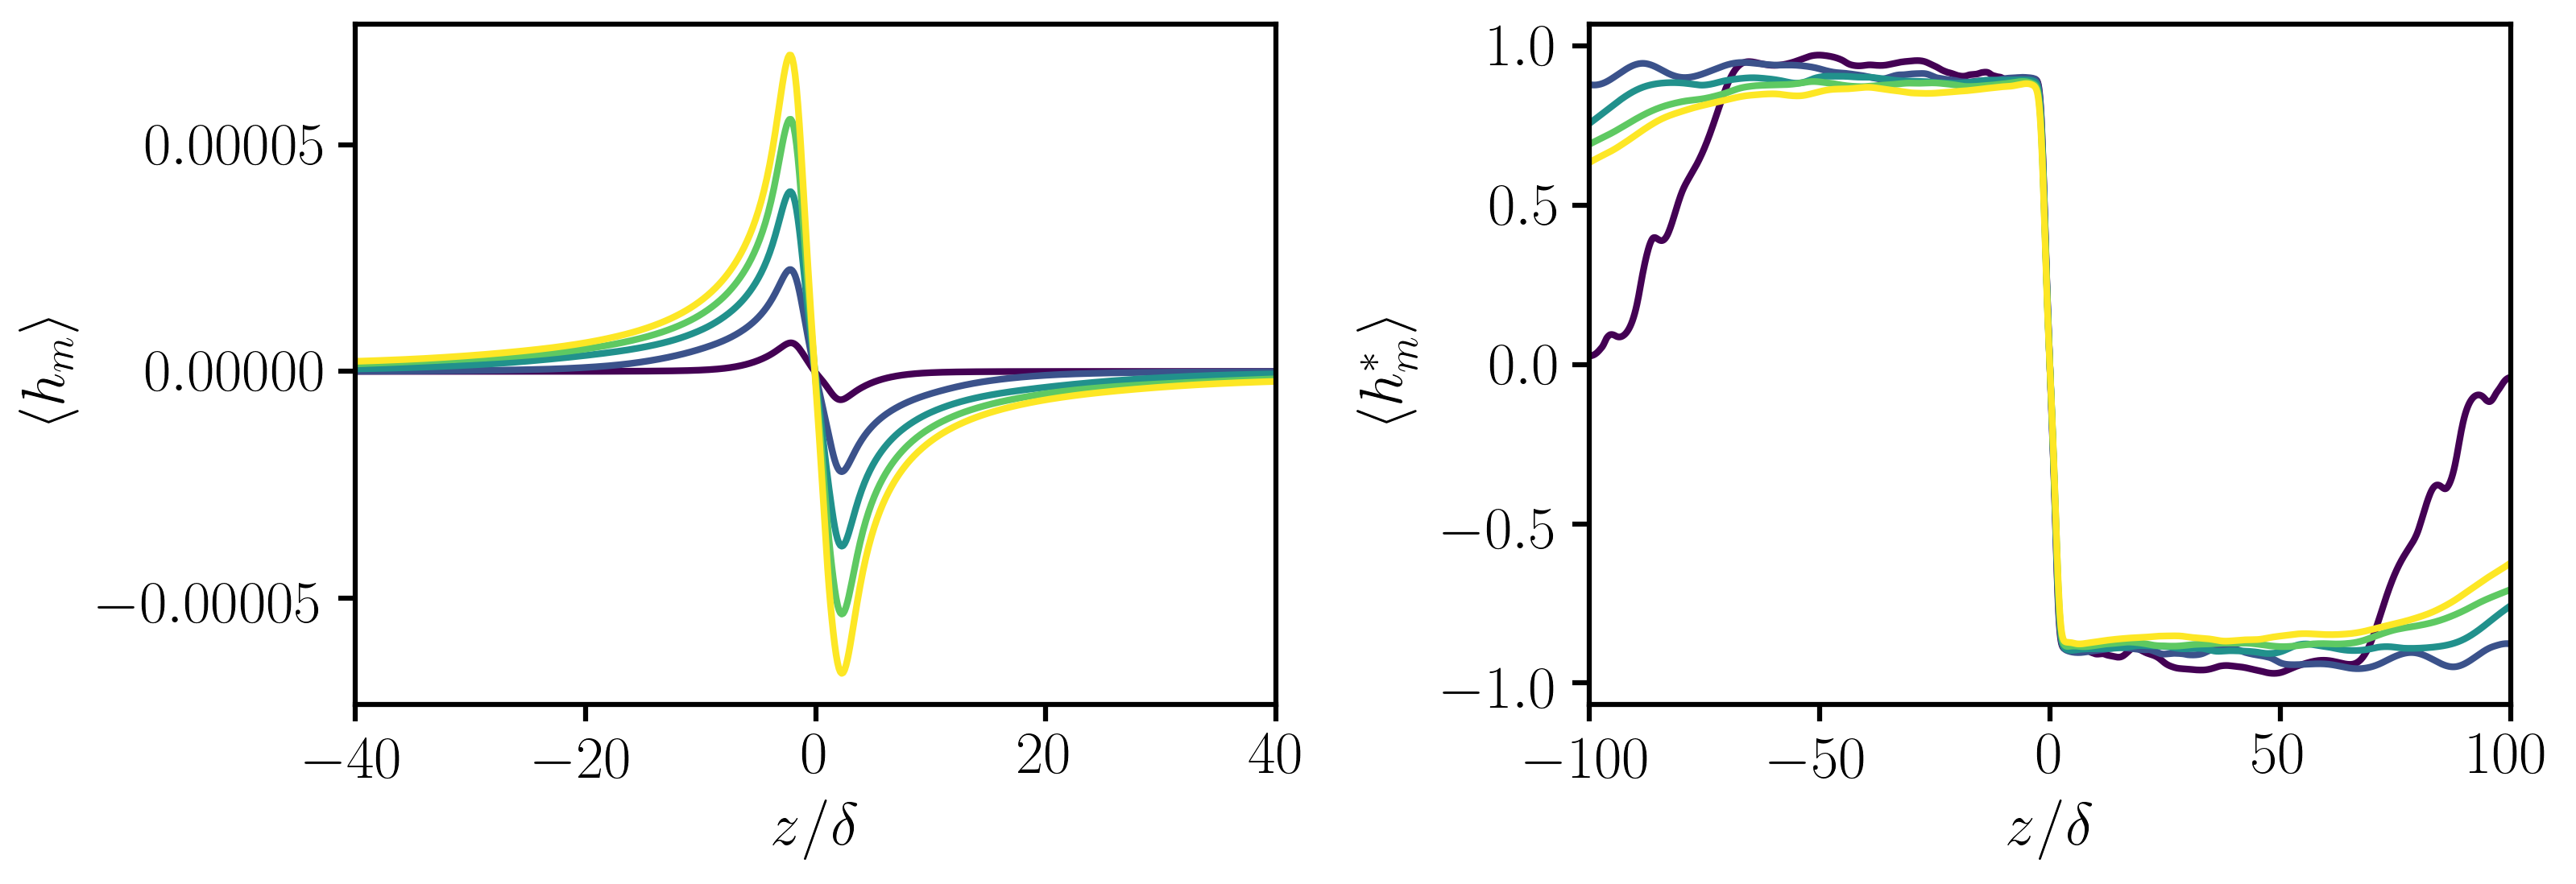

In [64]:
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
ax = plt.gca()
ax.set_prop_cycle(color=[scalar_map.to_rgba(i) for i in range(numcolors)])
for i in range(numcolors):
    plt.plot(z,hmav[:,i])

plt.xlim(-40,40)
plt.xlabel(r'$z/\delta$')
plt.ylabel(r'$\langle h_m \rangle$')

plt.subplot(1,2,2)
ax = plt.gca()
ax.set_prop_cycle(color=[scalar_map.to_rgba(i) for i in range(numcolors)])
for i in range(numcolors):
    plt.plot(z,hmavr[:,i])

plt.xlim(-100,100)
plt.xlabel(r'$z/\delta$')
plt.ylabel(r'$\langle h_m^* \rangle$')
plt.tight_layout()
plt.savefig(outpath+sub+'hmav.pdf', dpi=600, bbox_inches='tight')

Cross helicity magnitude:

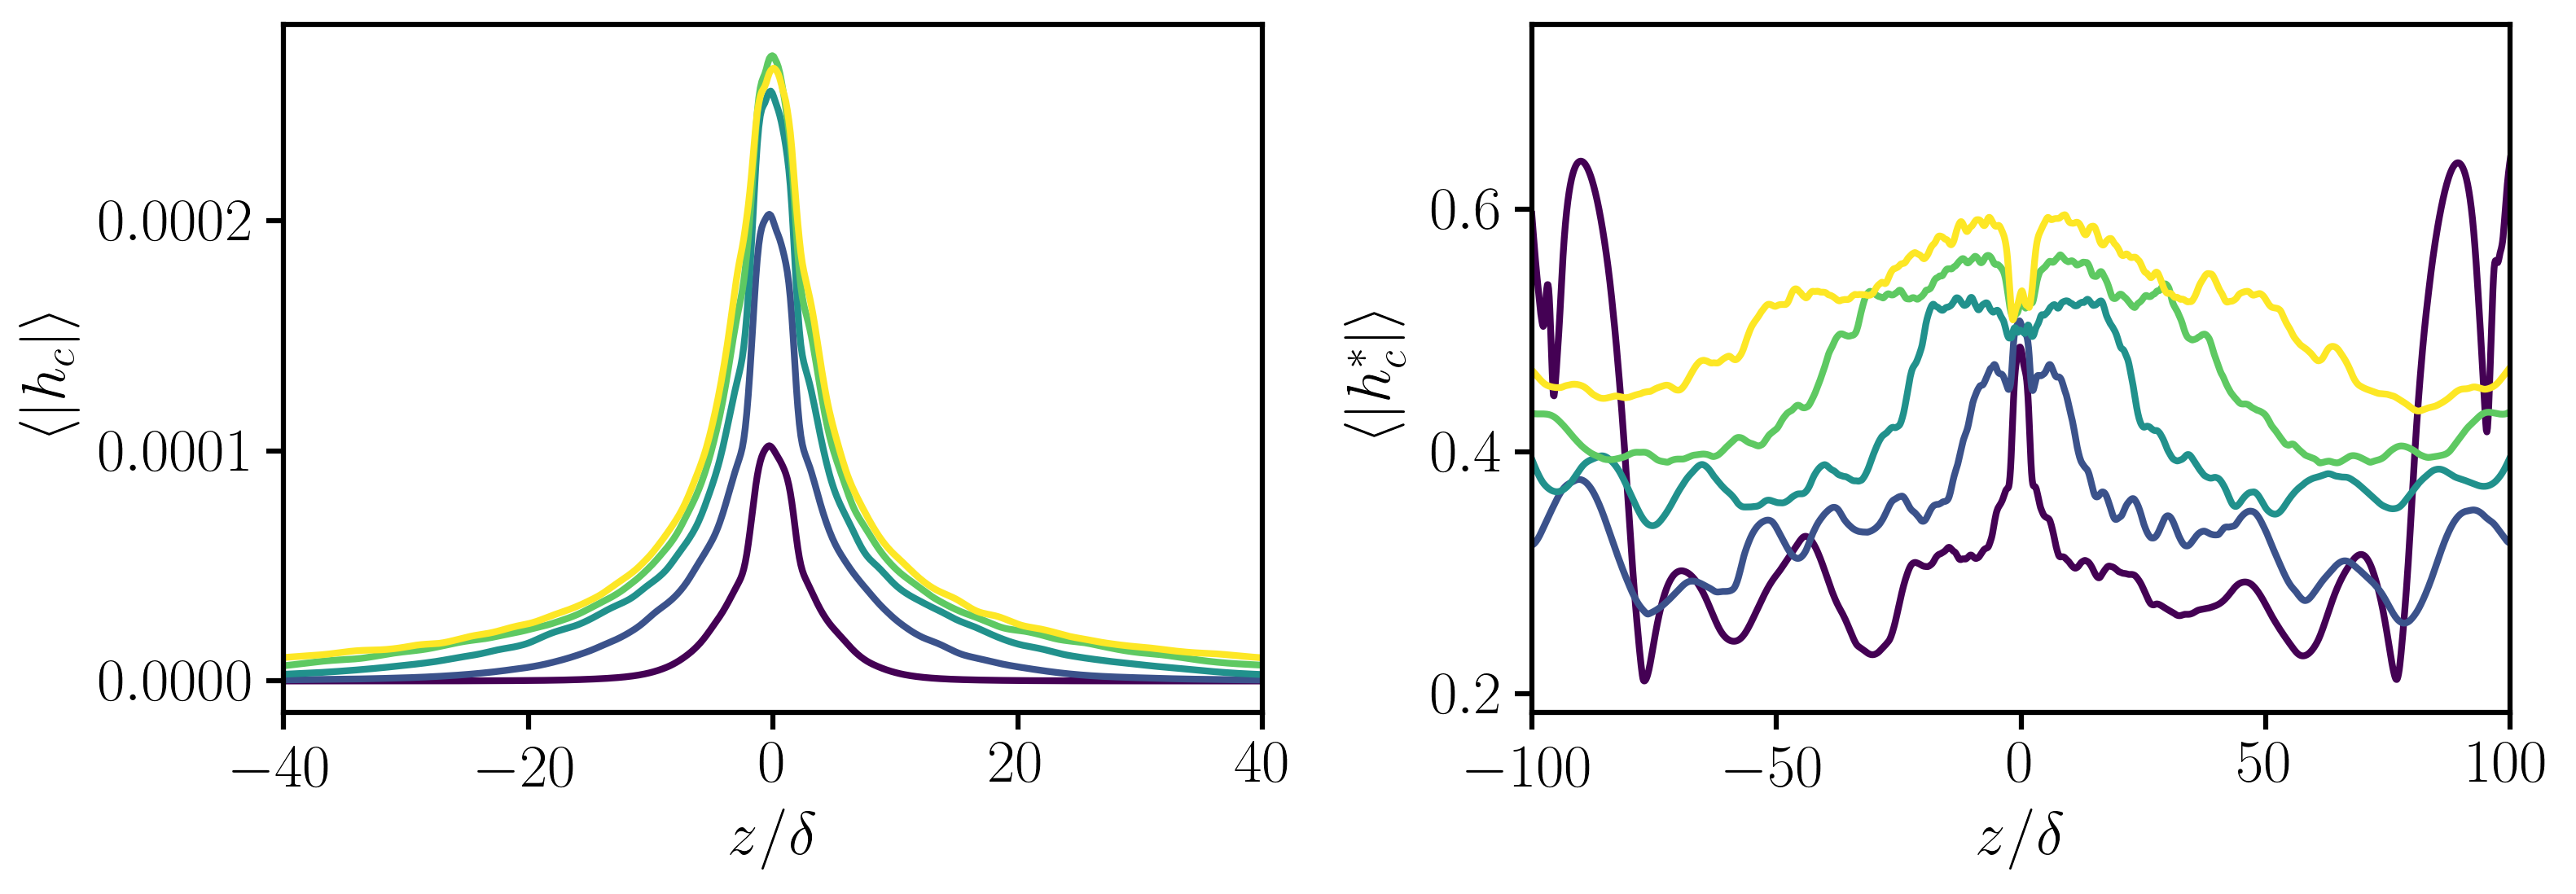

In [65]:
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
ax = plt.gca()
ax.set_prop_cycle(color=[scalar_map.to_rgba(i) for i in range(numcolors)])
for i in range(numcolors):
    plt.plot(z,hcav[:,i])

plt.xlim(-40,40)
plt.xlabel(r'$z/\delta$')
plt.ylabel(r'$\langle |h_c| \rangle$')

plt.subplot(1,2,2)
ax = plt.gca()
ax.set_prop_cycle(color=[scalar_map.to_rgba(i) for i in range(numcolors)])
for i in range(numcolors):
    plt.plot(z,hcavr[:,i])

plt.xlim(-100,100)
plt.xlabel(r'$z/\delta$')
plt.ylabel(r'$\langle |h_c^*| \rangle$')
plt.tight_layout()
plt.savefig(outpath+sub+'hcav.pdf', dpi=600, bbox_inches='tight')

emf in the direction of the mean-field:

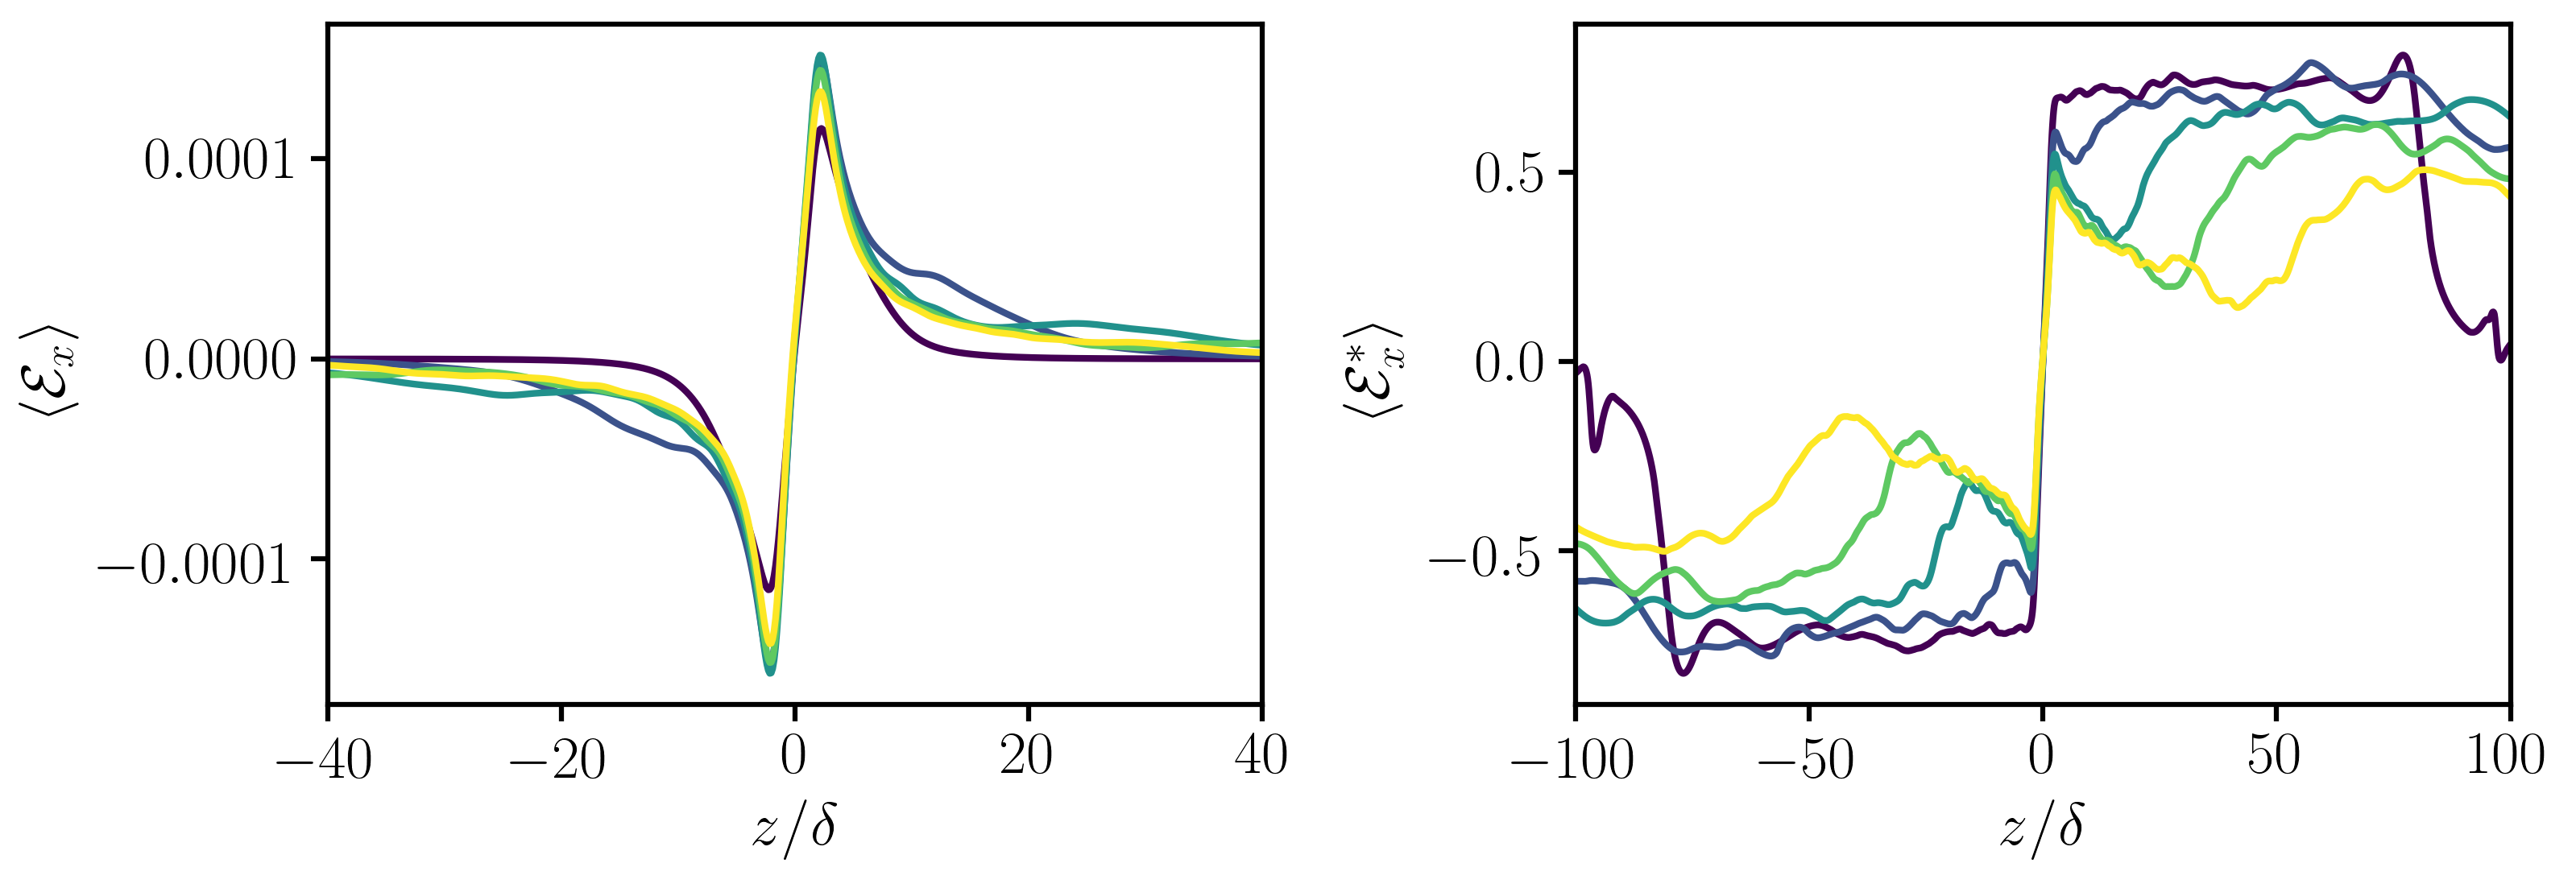

In [66]:
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
ax = plt.gca()
ax.set_prop_cycle(color=[scalar_map.to_rgba(i) for i in range(numcolors)])
for i in range(numcolors):
    plt.plot(z,emf[:,i])

plt.xlim(-40,40)
plt.xlabel(r'$z/\delta$')
plt.ylabel(r'$\langle \mathcal{E}_x \rangle$')

plt.subplot(1,2,2)
ax = plt.gca()
ax.set_prop_cycle(color=[scalar_map.to_rgba(i) for i in range(numcolors)])
for i in range(numcolors):
    plt.plot(z,emfr[:,i])

plt.xlim(-100,100)
plt.xlabel(r'$z/\delta$')
plt.ylabel(r'$\langle \mathcal{E}_x^* \rangle$')
plt.tight_layout()
plt.savefig(outpath+sub+'emfav.pdf', dpi=600, bbox_inches='tight')